In [1]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from ipyaladin import Aladin    # version >=0.3.0

# For plots
import matplotlib.pyplot as plt

# Welcome to VizieR example workflow

[![Vizier](https://custom-icon-badges.demolab.com/badge/Vizier-gray.svg?logo=vizier&logoColor=orange&logoWidth=20)](https://vizier.cds.unistra.fr/viz-bin/VizieR "https://vizier.cds.unistra.fr/viz-bin/VizieR")

It is a generic notebook, highlighting what can be done once you chose a catalog. This workflow is suggested by [CDS](https://cdsweb.unistra.fr/) (Strasbourg Astronomical Data Center, house of [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR)).

--------------------------------------------------------

Modify the <a href='https://vizier.cds.unistra.fr/'>VizieR catalogue</a> name (variable <b>CATALOGUE</b>) and anything else you might feel like exploring!

## 1. Setup

This example notebook has the following dependencies: 

**Required**
- pyvo : this library facilitates the access to the Virtual Observatory (VO) resources. VizieR is part of the VO.
This notebook needs version >=1.4.1

**Optional, for visualization**
- ipyaladin : this is the Aladin-lite sky viewer, bundled as a jupyter widget. It allows to plot catalogs and multi-order coverages (MOC)
- matplotlib : an other option to see catalog points and MOCs

## 2. Metadata exploration with the Virtual Observatory registry

This part uses [pyvo](https://pyvo.readthedocs.io/en) to connect to the VO registry.

In [2]:
# The catalogue name in VizieR
CATALOGUE = "J/A+A/683/A234"

We first retrieve catalogue information.

In [3]:
# Each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# The VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# The actual query to the registry
voresource = registry.search(ivoid = catalogue_ivoid)[0]

In [4]:
# We can print metadata information about the catalogue
voresource.describe(verbose = True)

Cepheid Metallicity in the Leavitt Law Survey
Short Name: J/A+A/683/A234
IVOA Identifier: ivo://cds.vizier/j/a+a/683/a234
Access modes: conesearch, tap#aux, web
Multi-capability service -- use get_service()

The highly debated effect of metallicity on the absolute magnitudes of
classical Cepheid variables needs to be properly quantified for determining
accurate and precise distances based on their Leavitt Law. Our goal is to
obtain homogeneous optical and near-infrared light curves of Milky Way Cepheid
variables complementing their already collected high-resolution spectroscopic
metallicities as part of the C-MetaLL survey. Together with Gaia parallaxes,
we investigate period-luminosity-metallicity relations for Cepheid variables
at multiple wavelengths. We present homogeneous multiband (grizJHKs) time-
series observations of 78 Cepheids including 49 fundamental mode variables and
29 first-overtone mode variables. These observations were collected
simultaneously using the ROS2 and REMI

We can also inspect in details the `resource` object and access the attributes not provided by the describe method. See for example, the first author of a resource: 

In [5]:
voresource.creators[0]

'Bhardwaj A.'

## 3. Access the tabular data of this catalog

We can have a look at the tables available in the catalogue.

In [6]:
tables = voresource.get_tables()
tables

{'J/A+A/683/A234/table1': <VODataServiceTable name="J/A+A/683/A234/table1">... 28 columns ...</VODataServiceTable>}

In [7]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['J/A+A/683/A234/table1']

The actual data can then be access using any of the ``access_modes`` of the voresource.

In [8]:
voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

The web access is found by following the ``reference_url``

In [9]:
voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/683/A234'

### 3.1 Execute a SQL/ADQL query

The ``tap#aux`` in the ``access_mode`` response indicates that we can also do a SQL/ADQL query for these VizieR tables.

On the first table of the catalogue, we execute an <a href='https://www.ivoa.net/documents/latest/ADQL.html'>ADQL</a> query.

In [10]:
# Get the first table of the catalogue
first_table_name = tables_names[0]

# Execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = voresource.get_service("tap").run_sync(
    f'select TOP 10 * from "{first_table_name}"',
)
tap_records

<DALResultsTable length=10>
recno       GaiaDR3       n_GaiaDR3   Per    ... e_[Fe/H]    _RA       _DE   
                                       d     ...             deg       deg   
int32        int64           str1   float64  ... float64   float64   float64 
----- ------------------- --------- -------- ... -------- --------- ---------
    1 1825190337236422016           32.06123 ...     0.11 293.93649  18.94518
    2 1825428480248517376             5.9387 ...      0.5 293.56564  19.57069
    3 1834213582473654144            5.63099 ...     0.15 299.72294   24.3951
    4 2018385387883485056           70.79719 ...       -- 294.96545  22.26931
    5 2936063665309240576            1.97524 ...     0.17 107.55532  -15.1994
    6 2936165984303583360            3.52263 ...     0.13 105.87696 -15.54335
    7 2936274153063501824            6.38872 ...     0.11 107.13206 -14.90745
    8 2940212053953709312           16.93958 ...     0.19  97.41343 -18.67407
    9 2947876298535964416           

<!-- section position -->

We will explore the other access modes here.

### 3.2. Execute a cone search query

We use the Simple Cone Search (<a href='https://www.ivoa.net/documents/latest/ConeSearch.html'>SCS</a>) protocol of the virtual observatory (only available for tables with positions).

Adapt the radius and position of the center to your needs.

In [11]:
conesearch_radius = 1 / 60.0  # in degrees
conesearch_center = (293.9501953125, 18.937967068581862)

In [12]:
conesearch_records = voresource.get_service("conesearch").search(
    pos = conesearch_center,
    sr = conesearch_radius,
)
conesearch_records

<DALResultsTable length=1>
   _r    recno       GaiaDR3       n_GaiaDR3 ... Simbad    _RA       _DE   
                                             ...           deg       deg   
float64  int32        str19           str1   ...  str6   float64   float64 
-------- ----- ------------------- --------- ... ------ --------- ---------
0.014837     1 1825190337236422016           ... Simbad 293.93649  18.94518

## 4. Get the catalogue coverage

VizieR also provides the coverage of each catalogue with Multiple Order Coverage (<a href='https://ivoa.net/documents/MOC/'>MOC</a>) at order 10 -- meaning with a 0.001 rad spacial resolution.

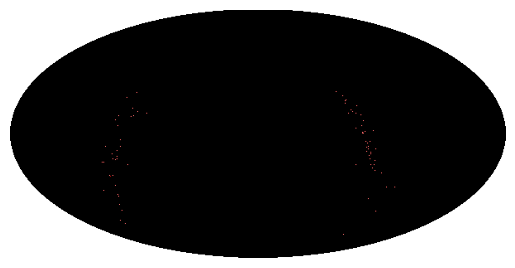

In [13]:
# Retrieve the MOC
catalogue_coverage = MOC.from_fits(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
)
catalogue_coverage.display_preview()

We can plot the coverage with ``matplotlib``.

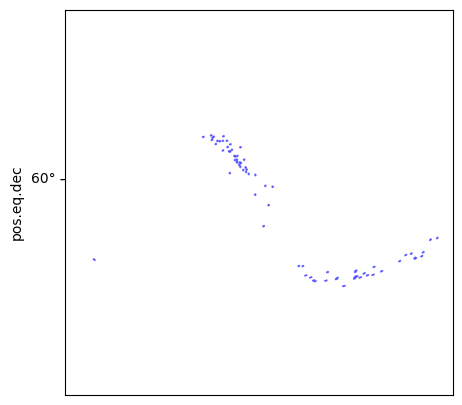

In [14]:
fig = plt.figure(figsize = (5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection = wcs)
catalogue_coverage.fill(ax = ax, wcs = wcs, alpha = 0.5, color = "blue")

or with ipyaladin

In [15]:
aladin = Aladin()
aladin

C:\Users\GWend\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\traitlets.py:842: DeprecationWarning: Deprecated in traitlets 4.1, use the instance .metadata dictionary directly, like x.metadata[key] or x.metadata.get(key, default)
  warn("Deprecated in traitlets 4.1, " + msg, DeprecationWarning, stacklevel=2)


Aladin(init_options=['_fov', '_target', 'background_color', 'coo_frame', 'full_screen', 'grid_color', 'grid_op…

We can add the tables and coverage in this ipyaladin window.

In [16]:
aladin.add_table(conesearch_records.to_table())

In [17]:
aladin.add_table(tap_records.to_table())

In [18]:
aladin.add_moc_from_URL(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
    moc_options={"opacity": 0.5, "color": "pink"},
)

C:\Users\GWend\AppData\Local\Temp\ipykernel_17688\4176677260.py:1: DeprecationWarning: add_moc_from_URL is replaced by add_moc that detects automaticallythat the MOC was given as an URL.
  aladin.add_moc_from_URL(


For more information about manipulating coverages, see [MOCpy documentation](https://cds-astro.github.io/mocpy/).